<a href="https://colab.research.google.com/github/prashantiyaramareddy/AI-ML-Learnings/blob/master/ComputerVision/DeepNeuralNW_2Layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Deep Neural Network with 2 hidden layers

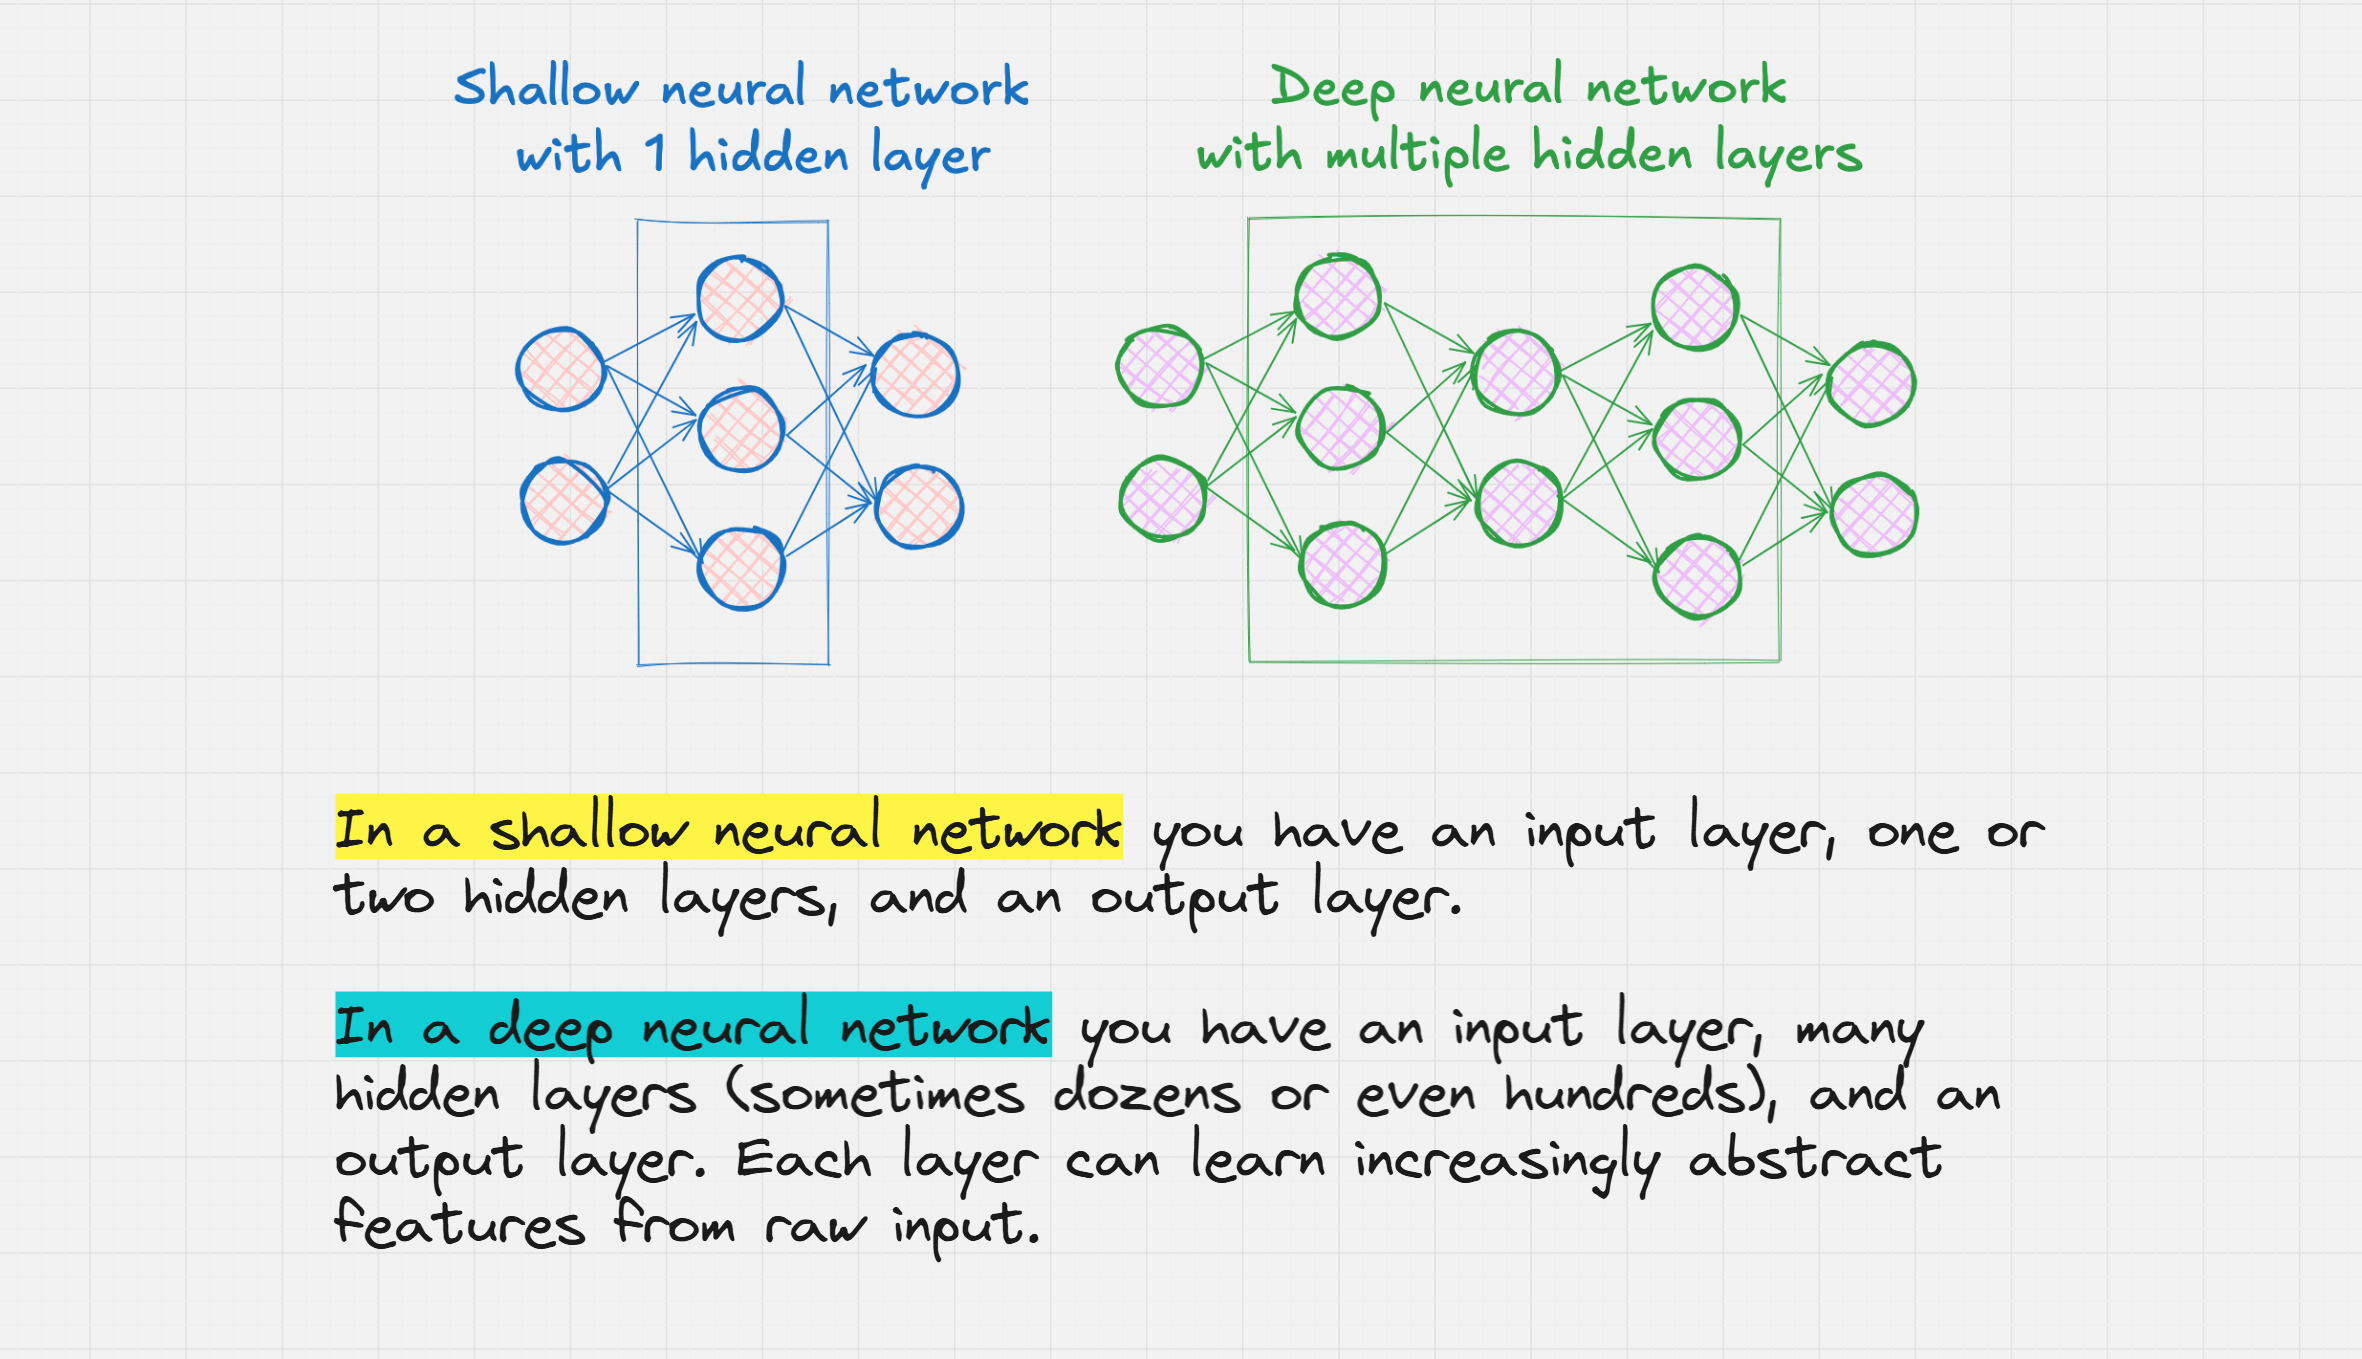

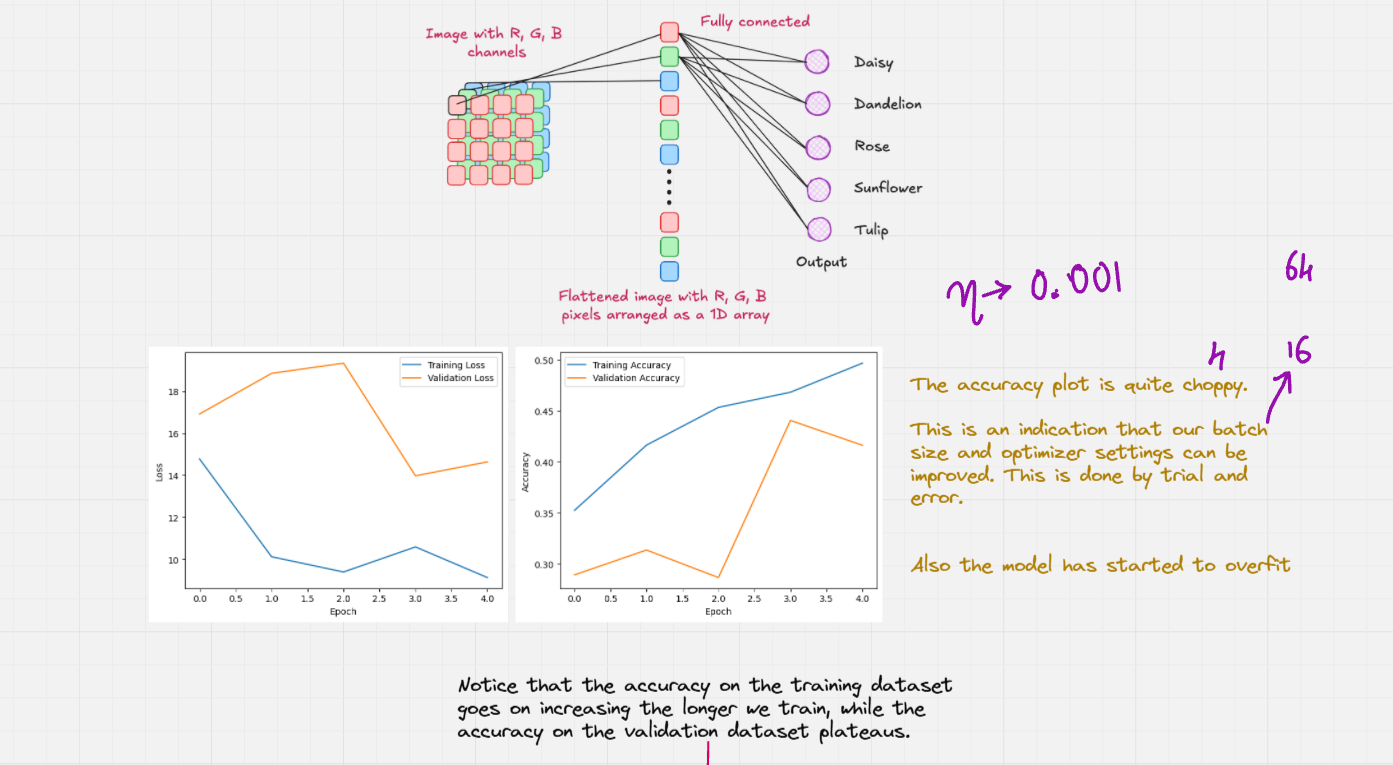

## Lets Define Neural Network with 2 layers

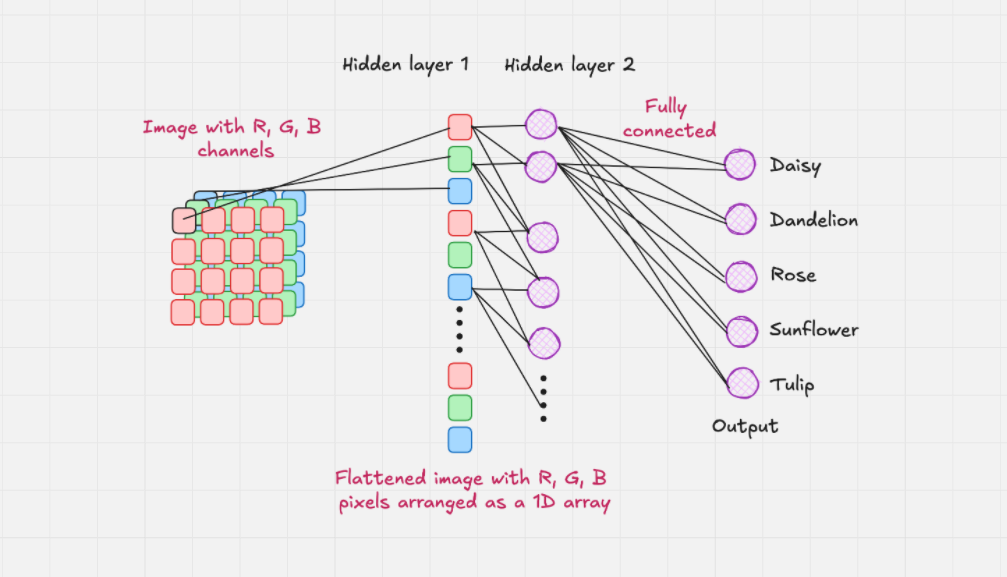

In [1]:

!pip install tensorflow
import tensorflow as tf
IMG_HEIGHT = 224
IMG_WIDTH = 224
IMG_CHANNELS = 3

CLASS_NAMES = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [2]:
def readanddecode(filename, resize_dims):
  # 1. Read the raw file
  img_bytes = tf.io.read_file(filename)

  # 2. Convert to tensor
  img_tensor = tf.io.decode_jpeg(img_bytes, channels=IMG_CHANNELS)

  # 3. Convert pixels to floats
  img_tensor = tf.image.convert_image_dtype(img_tensor, tf.float32)

  # 4. Resize the image
  img = tf.image.resize(img_tensor, resize_dims)

  return img


In [3]:
from os import read
def parse_csvline(csv_line):
  # record defaults specify the datatypes for each column
  record_default = ["", ""]
  filename, label_string = tf.io.decode_csv(csv_line, record_default)

  # Load the image
  img = readanddecode(filename,[IMG_HEIGHT, IMG_WIDTH])

  # Convert the label string to integer based on the CLASSNAMES index
  label = tf.argmax(tf.math.equal(CLASS_NAMES, label_string))

  return img, label

  return img, label

In [4]:
# Define Datasets
train_dataset = tf.data.TextLineDataset("gs://cloud-ml-data/img/flower_photos/train_set.csv").map(parse_csvline,num_parallel_calls=tf.data.AUTOTUNE).batch(16).prefetch(tf.data.AUTOTUNE)

eval_dataset = tf.data.TextLineDataset("gs://cloud-ml-data/img/flower_photos/eval_set.csv").map(parse_csvline,num_parallel_calls=tf.data.AUTOTUNE).batch(16).prefetch(tf.data.AUTOTUNE)

In [5]:
for image_batch, label_batch in train_dataset.take(3):
  print("Image batch shape",image_batch.shape)
  print("Label Batch Shape", label_batch.shape)
  print("Labels", label_batch.numpy())

Image batch shape (16, 224, 224, 3)
Label Batch Shape (16,)
Labels [0 1 1 1 0 2 1 0 4 3 0 3 1 4 4 1]
Image batch shape (16, 224, 224, 3)
Label Batch Shape (16,)
Labels [0 3 2 1 0 4 2 0 2 2 1 3 3 2 1 0]
Image batch shape (16, 224, 224, 3)
Label Batch Shape (16,)
Labels [3 1 1 1 1 0 1 2 4 3 3 2 0 1 4 0]


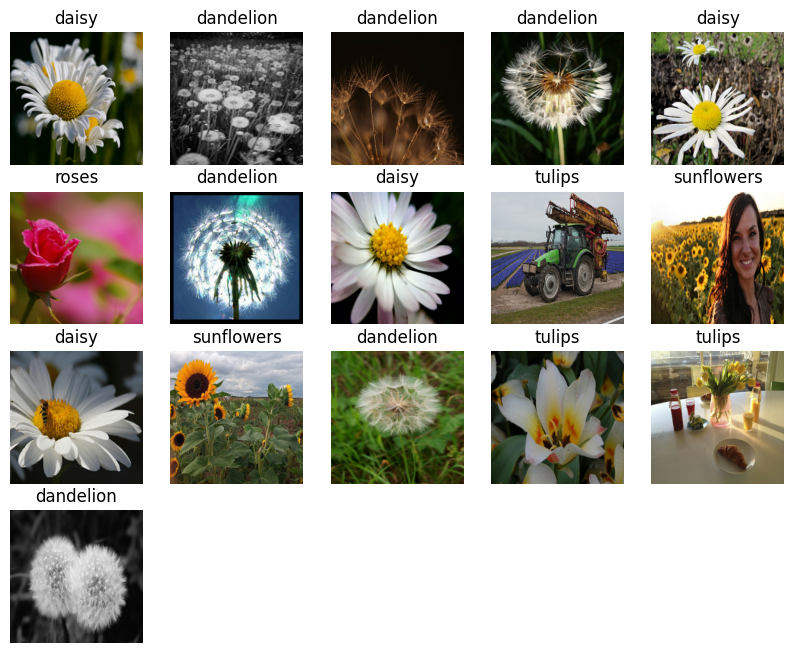

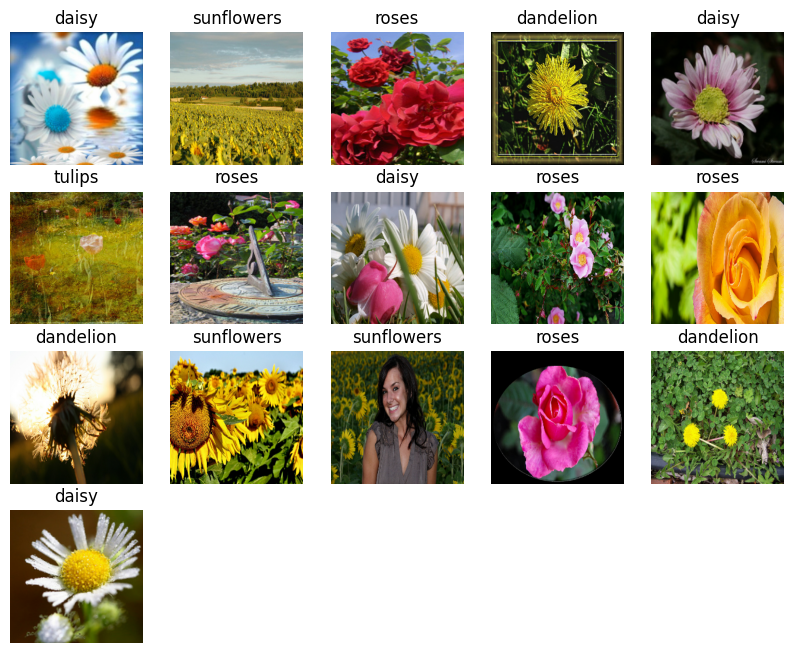

In [6]:
import matplotlib.pyplot as plt

for image_batch, label_batch in train_dataset.take(2):
  plt.figure(figsize=(10,10))
  for n in range(image_batch.shape[0]): # Iterate up to the actual batch size
    ax = plt.subplot(5,5,n+1)
    plt.imshow(image_batch[n])
    plt.title(CLASS_NAMES[label_batch[n]])
    plt.axis("off")

  plt.show()

In [10]:
# Model with 2 hidden layers
# First is a flattenned layer, 2nd is layer with 128 hidden units
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(len(CLASS_NAMES),activation='softmax')
])

model.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.1),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    19,267,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,268,357 (73.50 MB)

 Trainable params: 19,268,357 (73.50 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
epochs = 10
history = model.fit(
    train_dataset,
    validation_data=eval_dataset,
    epochs=epochs
)

Epoch 1/10
    207/Unknown 76s 358ms/step - accuracy: 0.2245 - loss: 1803.4624

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:160: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


207/207 ━━━━━━━━━━━━━━━━━━━━ 85s 402ms/step - accuracy: 0.2246 - loss: 1796.8022 - val_accuracy: 0.2351 - val_loss: 1.6041
Epoch 2/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 111s 539ms/step - accuracy: 0.2372 - loss: 1.6106 - val_accuracy: 0.2351 - val_loss: 1.6046
Epoch 3/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 125s 603ms/step - accuracy: 0.2369 - loss: 1.6115 - val_accuracy: 0.2351 - val_loss: 1.6047
Epoch 4/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 90s 434ms/step - accuracy: 0.2366 - loss: 1.6119 - val_accuracy: 0.2351 - val_loss: 1.6047
Epoch 5/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 98s 475ms/step - accuracy: 0.2397 - loss: 1.6122 - val_accuracy: 0.2351 - val_loss: 1.6047
Epoch 6/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 98s 473ms/step - accuracy: 0.2390 - loss: 1.6123 - val_accuracy: 0.2351 - val_loss: 1.6047
Epoch 7/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 84s 406ms/step - accuracy: 0.2372 - loss: 1.6124 - val_accuracy: 0.2351 - val_loss: 1.6046
Epoch 8/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 75s 360ms/step - accuracy: 0.2372 - loss: 1.6124 